In [1]:
import glob, os, re, json
import pandas as pd
%reload_ext autoreload
%autoreload 2
ROOTDIR = "/Users/felix/Dropbox/work/supreme-broccoli/"
DATADIR = os.path.join(ROOTDIR, 'twitterdata')

def read_json_tweets(path=DATADIR):
    dfs = []
    files = glob.glob(os.path.join(DATADIR, "**", "*.json"), recursive=True)
    for file in files:
        json_lines = open(os.path.join(file)).readlines()
        df = pd.DataFrame([json.loads(line) for line in json_lines])
        df['manifestolabel_keywords'] = file.split('/')[-2]
        df['date'] = pd.to_datetime(df['formatted_date']).dt.tz_localize(None)
        dfs.append(df)        
    return pd.concat(dfs).reset_index(drop=True)

def read_csv_tweets(path=DATADIR):
    files = glob.glob(os.path.join(DATADIR,"**", "*.csv"), recursive=True)
    dfs = []
    for file in files:
        df = pd.read_csv(open(file,'rU'), encoding='utf8', engine='c' ,
                          error_bad_lines=False, 
                          parse_dates=True,
                          infer_datetime_format=True)
    
        df['manifestolabel_keywords'] = file.split('/')[-2]
        df['date'] = pd.to_datetime(df['formatted_date']).dt.tz_localize(None)
        dfs.append(df)
    return pd.concat(dfs).reset_index(drop=True)

df = pd.concat([read_json_tweets(), read_csv_tweets()]).drop_duplicates(subset='id')
df['before'] = df['date'] < pd.Timestamp(2020,3,15)
df['after'] = df['date'] > pd.Timestamp(2020,3,15)

df


<ipython-input-1-0b75d0bee06b>:23: DeprecationWarning: 'U' mode is deprecated
  df = pd.read_csv(open(file,'rU'), encoding='utf8', engine='c' ,


,username,to,text,retweets,favorites,replies,id,permalink,author_id,formatted_date,hashtags,mentions,geo,urls,url_text,manifestolabel_keywords,date,before,after
0,WISSENAgentur,None,Rede über Deine Vision und Ziele! Als viertes ...,0.0,0.0,0.0,1223029926003126273,https://twitter.com/WISSENAgentur/status/12230...,7.892181e+07,Thu Jan 30 23:47:11 +0000 2020,#Prinzip #Unternehmer #Manager #Mitarbeiter #V...,,,https://www.wissen-agentur.de/w-zzb05.html,,internationalism -,2020-01-30 23:47:11,True,False
1,BarrowsMikeOtto,mrdanwalker,Ruff(us) Brevett Lassie Diarra Graham FENTON F...,0.0,16.0,3.0,1223025959869218816,https://twitter.com/BarrowsMikeOtto/status/122...,7.097834e+07,Thu Jan 30 23:31:26 +0000 2020,,,,,,internationalism -,2020-01-30 23:31:26,True,False
2,liam_witte,None,Mal ernsthaft diese Tweets in in denen ständig...,0.0,1.0,0.0,1223024892263784449,https://twitter.com/liam_witte/status/12230248...,9.048647e+17,Thu Jan 30 23:27:11 +0000 2020,,,,,,internationalism -,2020-01-30 23:27:11,True,False
3,Sara60603304,ivanaastrosol,Ich möchte gerne sie haben recht,0.0,1.0,0.0,1223022275034742789,https://twitter.com/Sara60603304/status/122302...,9.855458e+17,Thu Jan 30 23:16:47 +0000 2020,,,,,,internationalism -,2020-01-30 23:16:47,True,False
4,katha_krentz,MayrhoferMarina,"Sehr gerne - ich freue mich, wenn es hilft",0.0,1.0,0.0,1223015670545371136,https://twitter.com/katha_krentz/status/122301...,3.705631e+08,Thu Jan 30 22:50:33 +0000 2020,,,,,,internationalism -,2020-01-30 22:50:33,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267769,BalazsGabi,retolipp,Das stimmt nur bedingt. Wer sich mit ungarisch...,0.0,0.0,0.0,1.24539e+18,https://twitter.com/BalazsGabi/status/12453867...,1.688008e+09,Wed Apr 01 16:25:04 +0000 2020,NaN,NaN,NaN,NaN,NaN,economic planning +,2020-04-01 16:25:04,False,True
267771,Bundesbox,NaN,Darum habt ihr das Himmelreich vorgeheuchelt m...,0.0,0.0,0.0,1.24538e+18,https://twitter.com/Bundesbox/status/124538085...,2.967724e+08,Wed Apr 01 16:01:47 +0000 2020,NaN,NaN,NaN,https://soundcloud.com/user-948126179/cosmic-b...,JavaScript is disabled You need to enable Java...,economic planning +,2020-04-01 16:01:47,False,True
267787,LimFoto4u,Heila145,Du fährst aber auch Programm. Hut ab.,0.0,3.0,1.0,1.24528e+18,https://twitter.com/LimFoto4u/status/124528015...,1.144047e+08,Wed Apr 01 09:21:40 +0000 2020,NaN,NaN,NaN,NaN,NaN,economic planning +,2020-04-01 09:21:40,False,True
267795,tkrooss,NaN,Mannheimer Strumpfhersteller Jungfeld hat jetz...,0.0,0.0,1.0,1.24524e+18,https://twitter.com/tkrooss/status/12452350144...,4.531044e+07,Wed Apr 01 06:22:17 +0000 2020,NaN,@vonJungfeld,NaN,https://jungfeld.com/de/,Unsere beliebtesten Socken Newsletter Melde Di...,economic planning +,2020-04-01 06:22:17,False,True


In [130]:
(df.loc[df['after'],'manifestolabel_keywords'].value_counts() / df.loc[df['before'],'manifestolabel_keywords'].value_counts()).sort_values()

economic planning +       0.782486
social justice +          0.829381
traditional morality +    0.871413
political authority +     0.883441
national way of life -    0.885619
infrastructure +          0.910526
traditional morality -    0.965707
market regulation +       0.994091
social harmony +          1.020023
protectionism +           1.031529
internationalism -        1.038492
welfare -                 1.079015
democracy +               1.082926
national way of life +    1.117483
minority groups +         1.121154
military -                1.125693
gov-admin efficiency +    1.126263
constitution -            1.135971
military +                1.136049
culture +                 1.136368
nationalization +         1.136737
marxist analysis +        1.153038
europe +                  1.159251
peace +                   1.168100
foreign special -         1.169860
decentralism +            1.171890
foreign special +         1.180473
constitution +            1.196848
multiculturalism -  

In [2]:
from classifier import score_texts

In [3]:
df['text'] = df['text'].fillna('')
df_scored = score_texts(df)

/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator SGDClassifier from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimato

In [4]:
df_scored

,username,to,text,retweets,favorites,replies,id,permalink,author_id,formatted_date,...,manifestolabel_keywords,date,before,after,domain_proba,domain,rightleft_proba,rightleft,manifestolabel_proba,manifestolabel
0,WISSENAgentur,None,Rede über Deine Vision und Ziele! Als viertes ...,0.0,0.0,0.0,1223029926003126273,https://twitter.com/WISSENAgentur/status/12230...,7.892181e+07,Thu Jan 30 23:47:11 +0000 2020,...,internationalism -,2020-01-30 23:47:11,True,False,0.271202,Political System,0.514821,left,0.077626,social justice +
1,BarrowsMikeOtto,mrdanwalker,Ruff(us) Brevett Lassie Diarra Graham FENTON F...,0.0,16.0,3.0,1223025959869218816,https://twitter.com/BarrowsMikeOtto/status/122...,7.097834e+07,Thu Jan 30 23:31:26 +0000 2020,...,internationalism -,2020-01-30 23:31:26,True,False,0.373017,Economy,0.849772,left,0.089699,environmentalism +
2,liam_witte,None,Mal ernsthaft diese Tweets in in denen ständig...,0.0,1.0,0.0,1223024892263784449,https://twitter.com/liam_witte/status/12230248...,9.048647e+17,Thu Jan 30 23:27:11 +0000 2020,...,internationalism -,2020-01-30 23:27:11,True,False,0.442919,Welfare and Quality of Life,0.676427,right,0.320030,social justice +
3,Sara60603304,ivanaastrosol,Ich möchte gerne sie haben recht,0.0,1.0,0.0,1223022275034742789,https://twitter.com/Sara60603304/status/122302...,9.855458e+17,Thu Jan 30 23:16:47 +0000 2020,...,internationalism -,2020-01-30 23:16:47,True,False,0.223764,Welfare and Quality of Life,0.587666,right,0.091552,freedom/human rights +
4,katha_krentz,MayrhoferMarina,"Sehr gerne - ich freue mich, wenn es hilft",0.0,1.0,0.0,1223015670545371136,https://twitter.com/katha_krentz/status/122301...,3.705631e+08,Thu Jan 30 22:50:33 +0000 2020,...,internationalism -,2020-01-30 22:50:33,True,False,0.440530,Welfare and Quality of Life,0.579911,right,0.129861,social justice +
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267769,BalazsGabi,retolipp,Das stimmt nur bedingt. Wer sich mit ungarisch...,0.0,0.0,0.0,1.24539e+18,https://twitter.com/BalazsGabi/status/12453867...,1.688008e+09,Wed Apr 01 16:25:04 +0000 2020,...,economic planning +,2020-04-01 16:25:04,False,True,0.383671,Welfare and Quality of Life,0.662672,left,0.163949,social justice +
267771,Bundesbox,NaN,Darum habt ihr das Himmelreich vorgeheuchelt m...,0.0,0.0,0.0,1.24538e+18,https://twitter.com/Bundesbox/status/124538085...,2.967724e+08,Wed Apr 01 16:01:47 +0000 2020,...,economic planning +,2020-04-01 16:01:47,False,True,0.439357,Political System,0.677200,right,0.259657,political authority +
267787,LimFoto4u,Heila145,Du fährst aber auch Programm. Hut ab.,0.0,3.0,1.0,1.24528e+18,https://twitter.com/LimFoto4u/status/124528015...,1.144047e+08,Wed Apr 01 09:21:40 +0000 2020,...,economic planning +,2020-04-01 09:21:40,False,True,0.387449,Welfare and Quality of Life,0.501529,left,0.078173,social justice +
267795,tkrooss,NaN,Mannheimer Strumpfhersteller Jungfeld hat jetz...,0.0,0.0,1.0,1.24524e+18,https://twitter.com/tkrooss/status/12452350144...,4.531044e+07,Wed Apr 01 06:22:17 +0000 2020,...,economic planning +,2020-04-01 06:22:17,False,True,0.467695,Political System,0.717081,right,0.383637,political authority +


In [5]:
df_scored.to_csv('tweets_with_urls.csv',index=False)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
stopwords = [x.strip() for x in open('stopwords.txt').readlines()[7:]]
vect = CountVectorizer(stop_words=stopwords).fit(df['text'])
before_words = vect.transform(df.loc[df['before'],'text'])
after_words = vect.transform(df.loc[df['after'],'text'])

In [66]:
import numpy as np
keywords = pd.read_csv('keywords.csv')
all_keywords = pd.Series(keywords.values.flatten()).dropna().to_list()
idx2word = {v:k for k,v in vect.vocabulary_.items()}

In [71]:
before = np.array(before_words.sum(axis=0)) + 1
before = before / before.max()
after = np.array(after_words.sum(axis=0)) + 1
after = after / after.max()
increase = (after / before).flatten()
inc_idx = [idx for idx in increase.argsort() if idx2word[idx] in all_keywords]

{'wiederaufbau': 9.398996047926047, 'arbeitslosengeldes': 9.68381410998441, 'öffnung': 9.724502404564179, 'unternehmerische': 10.029664613912425, 'esm': 10.079071828759286, 'bewaffnete': 10.467741918887912, 'bundeswehreinsatz': 11.06721612569647, 'demonstranten': 12.528136357806188, 'agrarwirtschaft': 13.488169653192573, 'schrittweisen': 13.834020157120587, 'kurzarbeit': 14.452135951374913, 'direktzahlungen': 17.984226204256764, 'rettungsschirm': 25.420012038709082, 'beschränkungen': 25.746648625752208, 'kampfdrohnen': 26.05407129591044, 'spargel': 28.633539637706882, 'konjunkturpakete': 29.74314333780926, 'systemrelevanten': 33.720424132981435, 'konjunkturprogramme': 35.96845240851353}
{'betriebswirtschaft': 0.053207769835079174, 'opferschutz': 0.06288190980509357, 'arbeitsproben': 0.06288190980509357, 'einsatzzeiten': 0.06288190980509357, 'familienfreundlich': 0.07685566753955882, 'direktwahl': 0.07685566753955882, 'zwangsprostitution': 0.08646262598200366, 'diskriminierungsschutz': 

In [74]:
top = 1000
most_increase = {idx2word[i]:increase[i] for i in inc_idx[-top:-1:] }
least_increase = {idx2word[i]:increase[i] for i in inc_idx[:top]}
# print(most_increase)
# print(least_increase)
pd.Series(most_increase).to_csv('increased.csv')
pd.Series(least_increase).to_csv('decreased.csv')

In [40]:
pd.Series(keywords.values.flatten()).dropna()

0                       agrar
1                 agenda 2020
2                 afghanistan
3                  abschlüsse
4                      absatz
                 ...         
11194     einkommensteuerfrei
11195              berufswahl
11196    gesellschaftspolitik
11197            strafbarkeit
11198        gesundheitlichen
Length: 9452, dtype: object

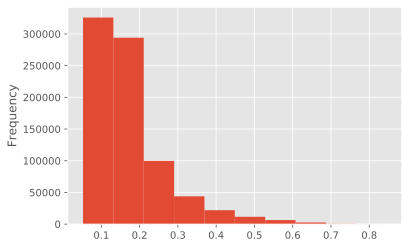

In [75]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df['manifestolabel_proba'].plot.hist()

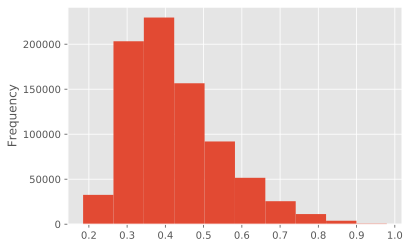

In [76]:
df['domain_proba'].plot.hist()

<Figure size 360x1080 with 0 Axes>

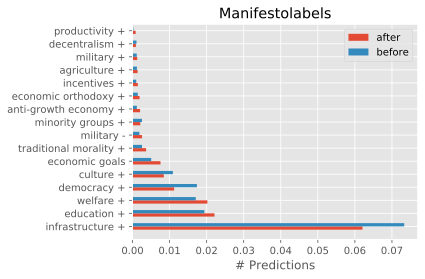

In [81]:
plt.figure(figsize=[5,15]);
ddd = pd.DataFrame(
    [df.loc[df['after'],'manifestolabel'].value_counts(normalize=True), 
     df.loc[df['before'],'manifestolabel'].value_counts(normalize=True)],
    index=['after','before']).T

ddd[abs(ddd['after'] / ddd['before'] - 1) > .1].plot.barh()

plt.ylim([-1,15.5])
plt.title('Manifestolabels')
plt.xlabel('# Predictions')
plt.tight_layout()
plt.savefig('manifestolabels_before_after.pdf')

<Figure size 360x1080 with 0 Axes>

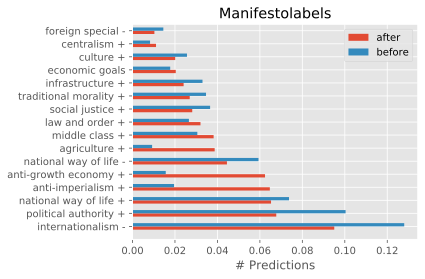

In [82]:
plt.figure(figsize=[5,15])

ddd = pd.DataFrame(
    [df.loc[df['after'],'manifestolabel_keywords'].value_counts(normalize=True), 
     df.loc[df['before'],'manifestolabel_keywords'].value_counts(normalize=True)],
    index=['after','before']).T

ddd[abs(ddd['after'] / ddd['before'] - 1) > .1].plot.barh()


plt.ylim([-1,15.5])
plt.title('Manifestolabels')
plt.xlabel('# Predictions')
plt.tight_layout()
plt.savefig('manifestolabels_before_after_keywords.pdf')

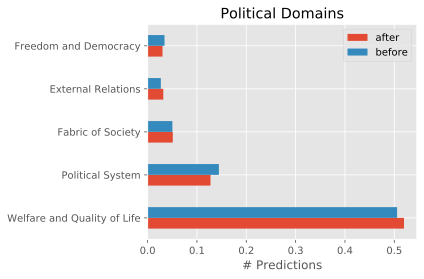

In [84]:
ddd = pd.DataFrame(
    [df.loc[df['after'],'domain'].value_counts(normalize=True), 
     df.loc[df['before'],'domain'].value_counts(normalize=True)],
    index=['after','before']).T

ddd[abs(ddd['after'] / ddd['before'] - 1) > .01].plot.barh()



plt.title('Political Domains')
plt.xlabel('# Predictions')
plt.tight_layout()
plt.savefig('domains_before_after.pdf')

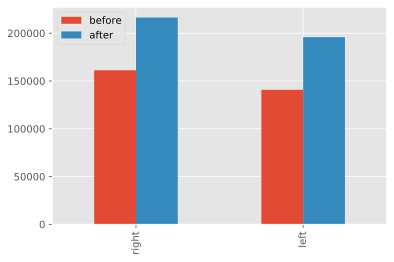

In [140]:
pd.DataFrame(
    [df.loc[df['before'],'rightleft'].value_counts(), 
     df.loc[df['after'],'rightleft'].value_counts()],
    index=['before','after']).T.plot.bar()
